In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('C:/Users/Devante/Downloads/insurance_dataset.csv')

# Display first few fows
print("First 5 rows of the dataset:")
df.head()

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# examine the distribution of categorical variables
print("\nDistribution of Categorical Variables:")
print("\nGender distribution:")
print(df['gender'].value_counts())
print("\nSmoker distribution:")
print(df['smoker'].value_counts())
print("\nRegion distribution:")
print(df['region'].value_counts())

First 5 rows of the dataset:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Summary:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
7

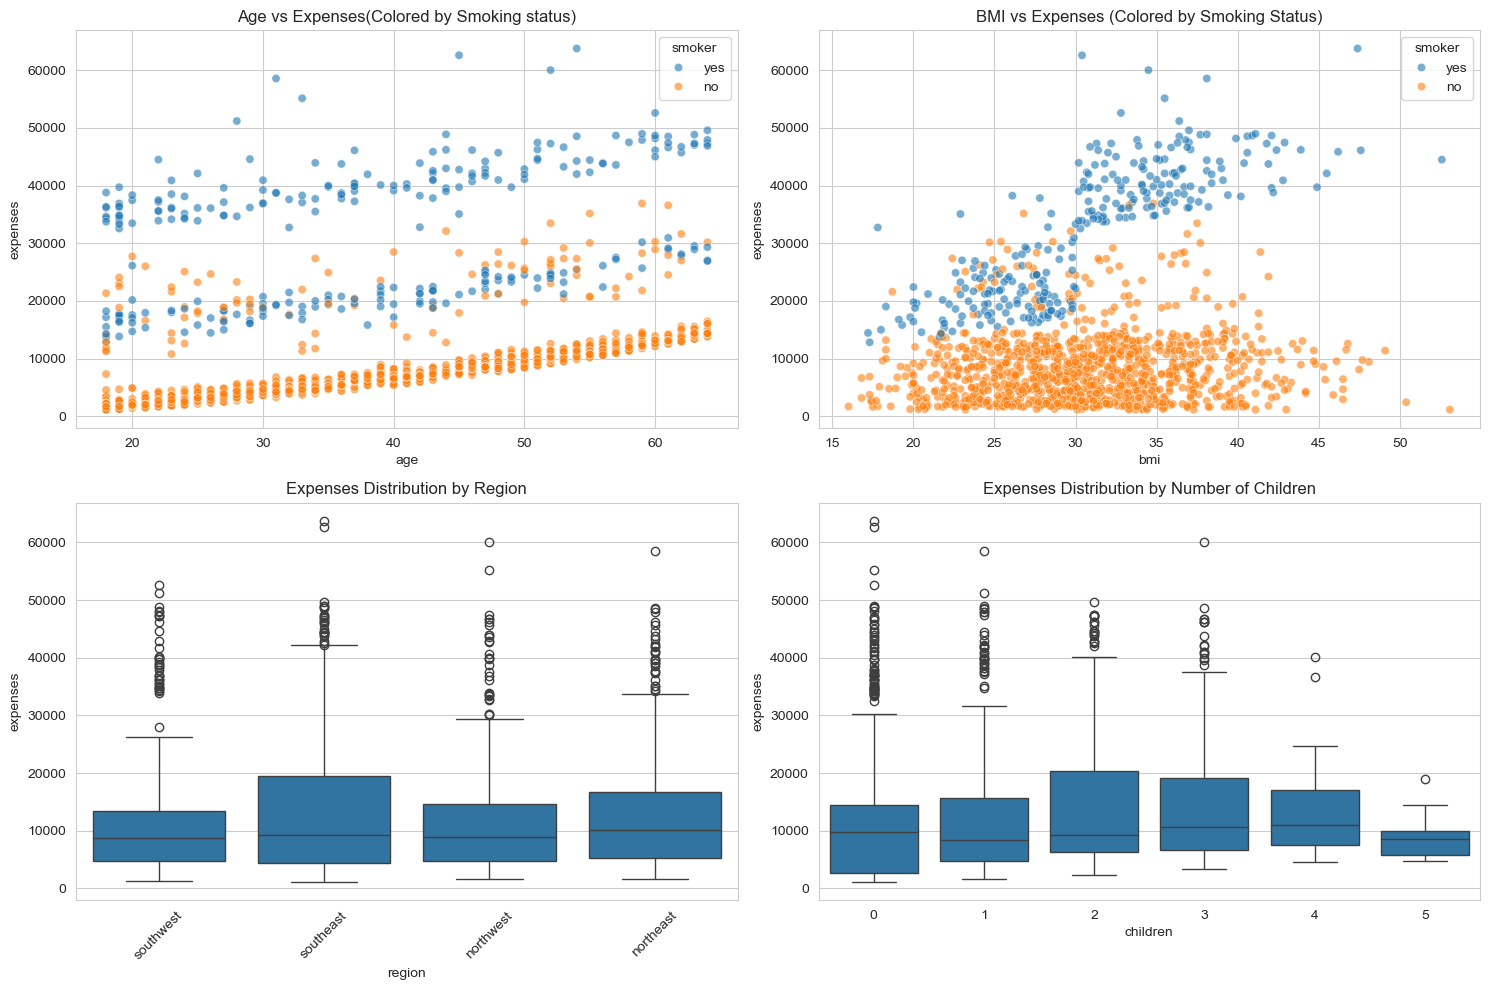


Key Statistics:

Average Expenses by Smoking Status:
smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

Average Expenses by Region:
region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

Correlation between BMI and Expenses:
0.198576255018932

Correlation between Age and Expenses:
0.2990081922850828


In [16]:
#set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

#create a subplot grid
plt.subplot(2, 2, 1)
# Plot 1: Age vs Expenses with Smoker differentiation
sns.scatterplot(data=df, x='age', y='expenses', hue='smoker', alpha=0.6)
plt.title('Age vs Expenses(Colored by Smoking status)')

plt.subplot(2, 2, 2)
# Plot2: BMI vs Expenses with smoler differentatiation
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker', alpha=0.6)
plt.title('BMI vs Expenses (Colored by Smoking Status)')

plt.subplot(2, 2, 3)
# Plot 3: Average Expenses by Region
sns.boxplot(data=df, x='region', y='expenses')
plt.title('Expenses Distribution by Region')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Plot 4: Average Expenses by Number of Children
sns.boxplot(data=df, x='children', y='expenses')
plt.title('Expenses Distribution by Number of Children')

plt.tight_layout()
plt.show()

# Print some key statistics
print("\nKey Statistics:")

print("\nAverage Expenses by Smoking Status:")
print(df.groupby('smoker')['expenses'].mean())

print("\nAverage Expenses by Region:")
print(df.groupby('region')['expenses'].mean())

print("\nCorrelation between BMI and Expenses:")
print(df['bmi'].corr(df['expenses']))

print("\nCorrelation between Age and Expenses:")
print(df['age'].corr(df['expenses']))


Training Logistic Regression...
Logistic Regression Performance:
Accuracy: 0.914179104477612

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.89      0.93      0.91       122

    accuracy                           0.91       268
   macro avg       0.91      0.92      0.91       268
weighted avg       0.92      0.91      0.91       268


Training Random Forest...
Random Forest Performance:
Accuracy: 0.9440298507462687

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       146
           1       0.95      0.93      0.94       122

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268


Training XGBoost...
XGBoost Performance:
Accuracy: 0.9291044776119403

Classification Report:
              precision   

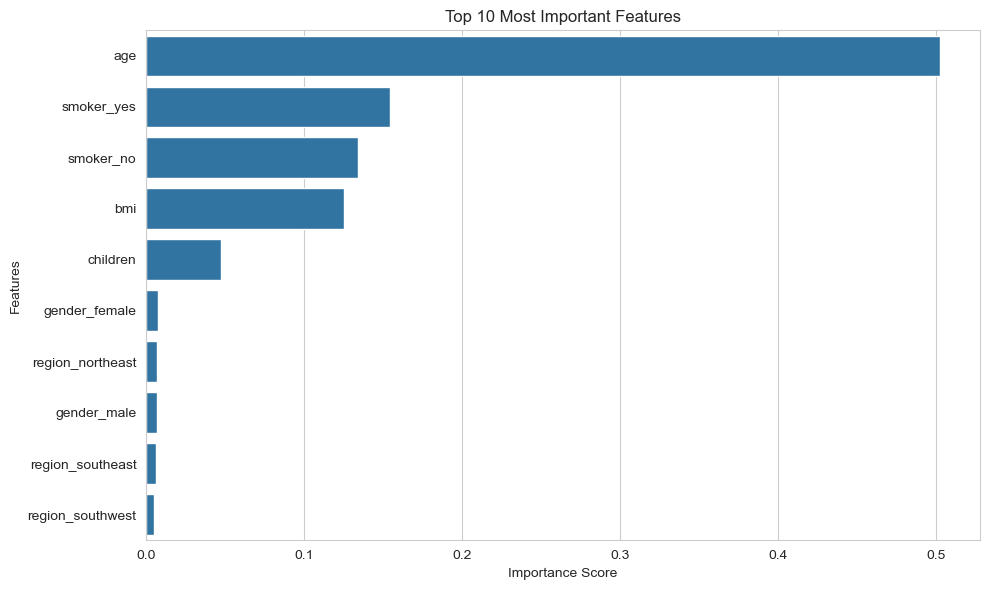


Top 10 Most Important Features:
             feature  importance
0                age    0.502790
6         smoker_yes    0.154363
5          smoker_no    0.133755
1                bmi    0.125469
2           children    0.047219
3      gender_female    0.007452
7   region_northeast    0.006968
4        gender_male    0.006479
9   region_southeast    0.006089
10  region_southwest    0.005131


In [24]:
# 1. Data Preprocessing
df_model = df.copy()

# One-hot encoding for categorical variables
df_model = pd.get_dummies(df_model, columns=['gender', 'smoker', 'region'])

# 2. Create target variable (convert expenses to binary classification)
median_expense = df_model['expenses'].median()
df_model['expense_class'] = (df_model['expenses'] > median_expense).astype(int)

# 3. Prepare features and target variable
X = df_model.drop(['expenses', 'expense_class'], axis=1)
y = df_model['expense_class']

# 4. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train and evaluate each model separately

# Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)  # Fixed: using lr_model instead of rf_model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# XGBoost
print("\nTraining XGBoost...")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

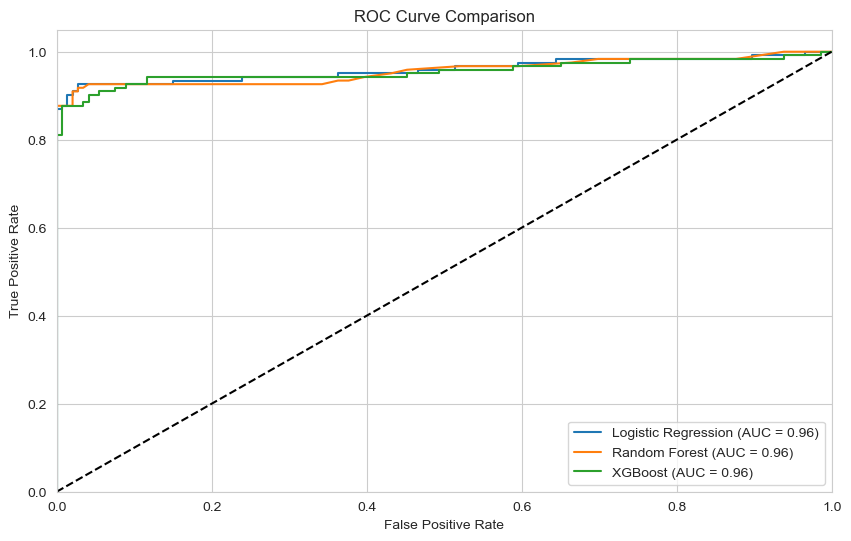


Logistic Regression Cross-Validation Results:
Mean Accuracy: 0.9037 (+/- 0.0316)

Random Forest Cross-Validation Results:
Mean Accuracy: 0.9215 (+/- 0.0336)

XGBoost Cross-Validation Results:
Mean Accuracy: 0.9215 (+/- 0.0376)


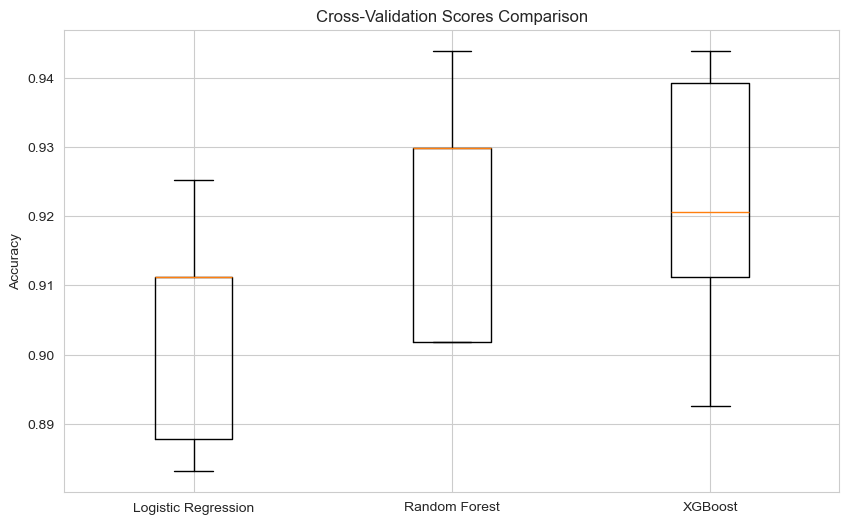


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9336448598130842

Best Model Performance on Test Set:
Accuracy: 0.9477611940298507

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       146
           1       0.96      0.93      0.94       122

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



In [32]:
# ROC Curve Comparison for model evaluation
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Perform cross-validation to assess model stability
from sklearn.model_selection import cross_val_score

# Function to perform 5-fold cross-validation
def perform_cross_validation(model, X, y, name):
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"\n{name} Cross-Validation Results:")
    print(f"Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    return cv_scores

# Perform cross-validation for all models
lr_cv = perform_cross_validation(lr_model, X_train_scaled, y_train, "Logistic Regression")
rf_cv = perform_cross_validation(rf_model, X_train_scaled, y_train, "Random Forest")
xgb_cv = perform_cross_validation(xgb_model, X_train_scaled, y_train, "XGBoost")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
box_data = [lr_cv, rf_cv, xgb_cv]
plt.boxplot(box_data, labels=['Logistic Regression', 'Random Forest', 'XGBoost'])
plt.title('Cross-Validation Scores Comparison')
plt.ylabel('Accuracy')
plt.show()

# Hyperparameter tuning for Random Forest (best performing model)
from sklearn.model_selection import GridSearchCV

# Define parameter grid for search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at leaf node
}

# Create grid search object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Metric for optimization
    n_jobs=-1             # Use all available cores
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Get predictions using best model
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_scaled)

# Evaluate best model performance
print("\nBest Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, best_rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, best_rf_pred))

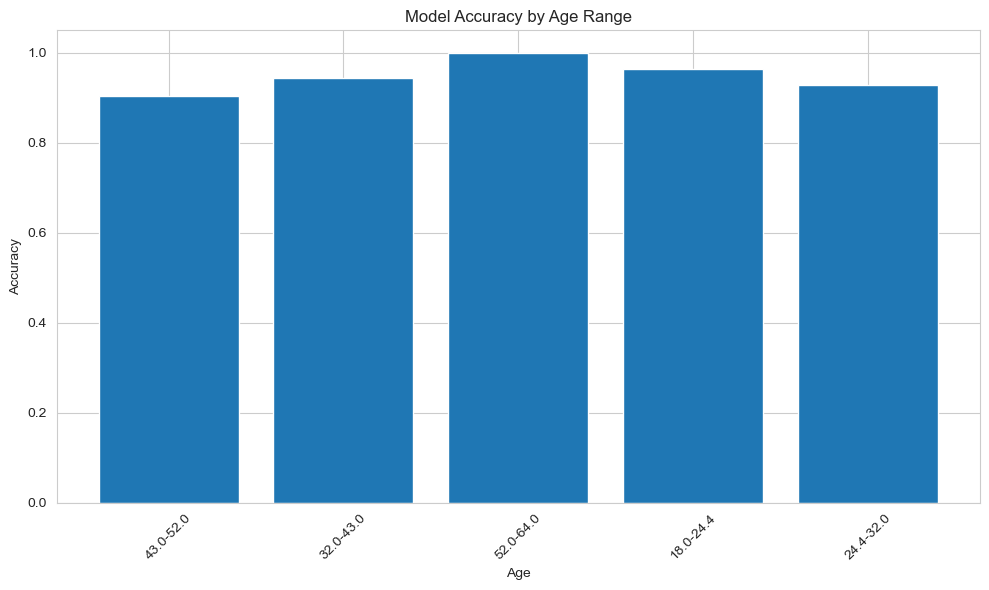

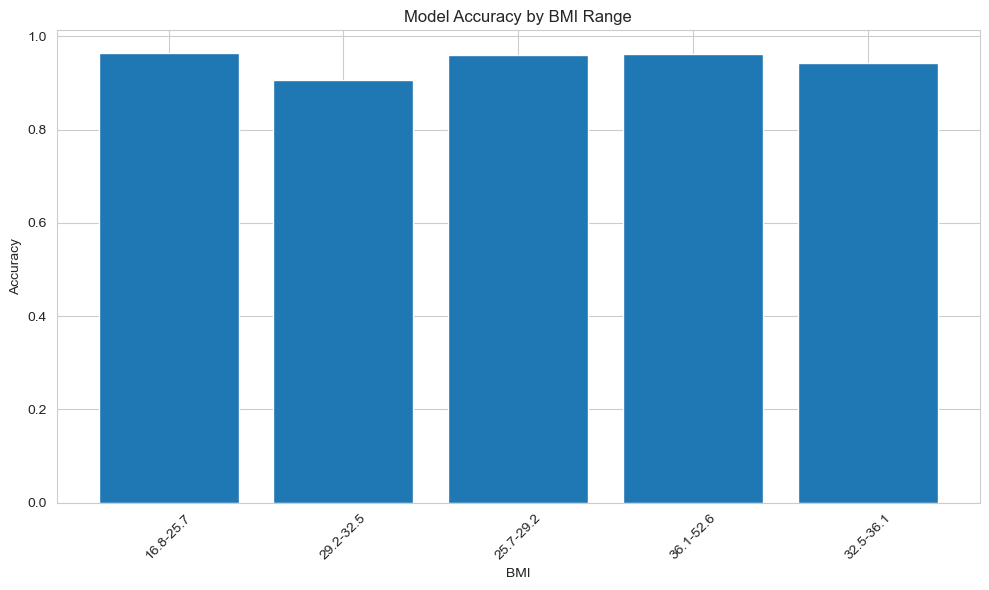

In [36]:
# Analyze model performance across different age groups and BMI ranges
def analyze_performance_by_range(feature, feature_name, model, X_test_scaled, y_test):
    # Create bins for the feature
    bins = pd.qcut(X_test[feature], q=5)

    # Get predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy for each bin
    results = []
    for bin_name in bins.unique():
        mask = bins == bin_name
        acc = accuracy_score(y_test[mask], y_pred[mask])
        results.append({
            'range': f"{bin_name.left:.1f}-{bin_name.right:.1f}",
            'accuracy': acc,
            'count': sum(mask)
        })

    # Plot results
    plt.figure(figsize=(10, 6))
    ranges = [r['range'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    plt.bar(ranges, accuracies)
    plt.title(f'Model Accuracy by {feature_name} Range')
    plt.xlabel(feature_name)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(results)

# Analyze performance by age and BMI
age_performance = analyze_performance_by_range('age', 'Age', best_rf_model, X_test_scaled, y_test)
bmi_performance = analyze_performance_by_range('bmi', 'BMI', best_rf_model, X_test_scaled, y_test)

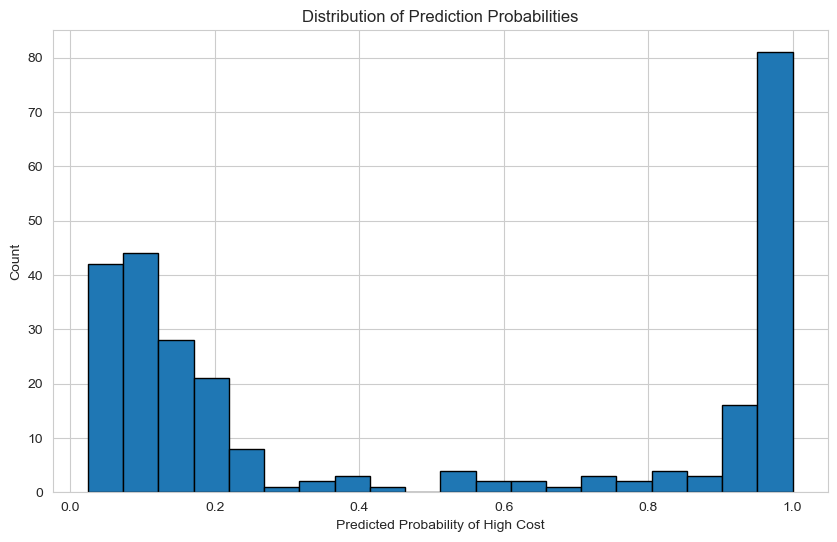


Accuracy for predictions with 60.0% confidence: 0.9500
Number of predictions: 260 (97.0%)

Accuracy for predictions with 70.0% confidence: 0.9567
Number of predictions: 254 (94.8%)

Accuracy for predictions with 80.0% confidence: 0.9612
Number of predictions: 232 (86.6%)

Accuracy for predictions with 90.0% confidence: 0.9691
Number of predictions: 162 (60.4%)

Error Analysis Summary:
Total errors: 14 (5.2%)

AGE statistics for errors:
count    14.000000
mean     36.142857
std      11.863695
min      19.000000
25%      27.250000
50%      36.500000
75%      48.000000
max      51.000000
Name: age, dtype: float64

BMI statistics for errors:
count    14.000000
mean     31.092857
std       5.187480
min      21.300000
25%      27.950000
50%      30.200000
75%      33.850000
max      41.400000
Name: bmi, dtype: float64

CHILDREN statistics for errors:
count    14.000000
mean      1.142857
std       1.231456
min       0.000000
25%       0.000000
50%       1.000000
75%       1.750000
max      

In [38]:
# Analyze prediction probabilities distribution
def analyze_prediction_probabilities (model, X_test_scaled, y_test):
    # Get prediction probabilites
    probs = model.predict_proba(X_test_scaled)[:, 1]

    # plot probability distribution
    plt.figure(figsize=(10, 6))
    plt.hist(probs, bins=20, edgecolor='black')
    plt.title('Distribution of Prediction Probabilities')
    plt.xlabel('Predicted Probability of High Cost')
    plt.ylabel('Count')
    plt.show()

    # Print confidence statistics
    confidence_levels = [0.6, 0.7, 0.8, 0.9]
    for conf in confidence_levels:
        high_conf_mask = (probs >= conf) | (probs <= (1-conf))
        high_conf_acc = accuracy_score(y_test[high_conf_mask], 
                                    (probs[high_conf_mask] >= 0.5).astype(int))
        print(f"\nAccuracy for predictions with {conf*100}% confidence: {high_conf_acc:.4f}")
        print(f"Number of predictions: {sum(high_conf_mask)} ({sum(high_conf_mask)/len(y_test)*100:.1f}%)")

analyze_prediction_probabilities(best_rf_model, X_test_scaled, y_test)

# Detailed error analysis
def detailed_error_analysis(model, X_test_scaled, X_test, y_test):
    y_pred = model.predict(X_test_scaled)
    errors = X_test[y_pred != y_test].copy()

    # Add additional information
    errors['true_label'] = y_test[y_pred != y_test]
    errors['predicted_label'] = y_pred[y_pred != y_test]
    errors['prediction_probability'] = model.predict_proba(X_test_scaled)[y_pred != y_test][:, 1]
    
    print("\nError Analysis Summary:")
    print(f"Total errors: {len(errors)} ({len(errors)/len(y_test)*100:.1f}%)")
    
    # Analyze errors by feature
    for feature in ['age', 'bmi', 'children']:
        print(f"\n{feature.upper()} statistics for errors:")
        print(errors[feature].describe())
    
    return errors

error_df = detailed_error_analysis(best_rf_model, X_test_scaled, X_test, y_test)

In [44]:
# Create interaction features
X_enhanced = df_model.copy()

# Age and BMI interaction
X_enhanced['age_bmi'] = X_enhanced['age'] * X_enhanced['bmi']

# Smoker and BMI interaction
X_enhanced['smoker_bmi'] = X_enhanced['smoker_yes'] * X_enhanced['bmi']

# Age and smoker interaction
X_enhanced['age_smoker'] = X_enhanced['age'] * X_enhanced['smoker_yes']

# BMI categories
X_enhanced['bmi_category'] = pd.cut(X_enhanced['bmi'],
                                   bins=[0, 18.5, 25, 30, 100],
                                   labels = ['Underweight', 'Normal', 'Overweight', 'Obese'])

# Prepare features and target
X_new = X_enhanced.drop(['expenses', 'expense_class', 'bmi_category'], axis=1)
y_new = X_enhanced['expense_class']

# Split and scale data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

# Train and evaluate model with new features
rf_model_new = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model_new.fit(X_train_scaled_new, y_train_new)
rf_pred_new = rf_model_new.predict(X_test_scaled_new)

# Print results
print("\nNew Model Performance:")
print("Accuracy:", accuracy_score(y_test_new, rf_pred_new))
print("\nClassification Report:")
print(classification_report(y_test_new, rf_pred_new))


New Model Performance:
Accuracy: 0.9402985074626866

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.96      0.91      0.93       122

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



In [50]:
# Create ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42, **grid_search.best_params_)),
        ('xgb', XGBClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42))
    ],
    voting='soft'
)

# Train the ensemble
ensemble_model.fit(X_train_scaled_new, y_train_new)

# Make predictions
ensemble_pred = ensemble_model.predict(X_test_scaled_new)

# Evaluate performance
print("\nEnsemble Model Performance:")
print("Accuracy:", accuracy_score(y_test_new, ensemble_pred))
print("\nClassification Report:")
print(classification_report(y_test_new, ensemble_pred))


Ensemble Model Performance:
Accuracy: 0.9477611940298507

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.92      0.94       122

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



In [54]:
def process_input_data(data):
    # One-hot encoding
    data_encoded = pd.get_dummies(data, columns=['gender', 'smoker', 'region'])
    
    # Create interaction features
    data_encoded['age_bmi'] = data_encoded['age'] * data_encoded['bmi']
    data_encoded['smoker_bmi'] = data_encoded['smoker_yes'] * data_encoded['bmi']
    data_encoded['age_smoker'] = data_encoded['age'] * data_encoded['smoker_yes']
    
    # Ensure all columns match training data
    for col in X_new.columns:
        if col not in data_encoded.columns:
            data_encoded[col] = 0
            
    return data_encoded[X_new.columns]

def predict_insurance_cost(age, bmi, children, smoker, gender, region):
    data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'gender': [gender],
        'region': [region]
    })
    
    data_processed = process_input_data(data)
    data_scaled = scaler_new.transform(data_processed)
    
    prediction = ensemble_model.predict(data_scaled)[0]
    probability = ensemble_model.predict_proba(data_scaled)[0]
    
    return {
        'prediction': 'High Cost' if prediction == 1 else 'Low Cost',
        'probability': probability[1] if prediction == 1 else probability[0],
        'confidence': max(probability)
    }

# Test the function
test_prediction = predict_insurance_cost(
    age=35,
    bmi=28.5,
    children=2,
    smoker='yes',
    gender='male',
    region='northeast'
)

print("Test Prediction Result:")
print(test_prediction)

Test Prediction Result:
{'prediction': 'High Cost', 'probability': 0.9934043898996766, 'confidence': 0.9934043898996766}


In [58]:
def enhanced_predict_insurance_cost(age, bmi, children, smoker, gender, region):
    # Business rules
    CONFIDENCE_THRESHOLD = 0.9
    HIGH_RISK_AGE = 50
    HIGH_RISK_BMI = 30
    
    # Base prediction
    base_result = predict_insurance_cost(age, bmi, children, smoker, gender, region)
    
    # Additional risk flags
    risk_flags = []
    if age > HIGH_RISK_AGE:
        risk_flags.append("High Age Risk")
    if bmi > HIGH_RISK_BMI:
        risk_flags.append("High BMI Risk")
    if smoker == 'yes':
        risk_flags.append("Smoking Risk")
        
    # Enhanced result
    result = {
        'prediction': base_result['prediction'],
        'confidence': base_result['confidence'],
        'risk_flags': risk_flags,
        'review_required': base_result['confidence'] < CONFIDENCE_THRESHOLD
    }
    
    return result

# Test enhanced prediction
test_case = enhanced_predict_insurance_cost(
    age=35,
    bmi=28.5,
    children=2,
    smoker='yes',
    gender='male',
    region='northeast'
)

print("\nEnhanced Prediction Result:")
print(test_case)


Enhanced Prediction Result:
{'prediction': 'High Cost', 'confidence': 0.9934043898996766, 'risk_flags': ['Smoking Risk'], 'review_required': False}


In [60]:
def cost_range_prediction(prediction_result):
    if prediction_result['prediction'] == 'High Cost':
        return {
            'cost_range': 'Expected >$10,000 annually',
            'confidence': prediction_result['confidence'],
            'risk_factors': prediction_result['risk_flags']
        }
    return {
        'cost_range': 'Expected <$10,000 annually',
        'confidence': prediction_result['confidence']
    }

In [62]:
def complete_prediction_system(age, bmi, children, smoker, gender, region):
   # Get base prediction
   base_result = enhanced_predict_insurance_cost(age, bmi, children, smoker, gender, region)
   
   # Add cost range estimation
   if base_result['prediction'] == 'High Cost':
       cost_min = 10000
       cost_max = 50000
       if 'Smoking Risk' in base_result['risk_flags']:
           cost_min = 20000
           cost_max = 70000
   else:
       cost_min = 2000
       cost_max = 10000
   
   # Final result
   final_result = {
       **base_result,
       'estimated_cost_range': f"${cost_min:,} - ${cost_max:,}",
       'recommendation': "Standard Policy" if not base_result['risk_flags'] else "High Risk Policy"
   }
   
   return final_result

# Test complete system
final_test = complete_prediction_system(
   age=35,
   bmi=28.5, 
   children=2,
   smoker='yes',
   gender='male',
   region='northeast'
)

print("\nComplete Prediction System Result:")
print(final_test)


Complete Prediction System Result:
{'prediction': 'High Cost', 'confidence': 0.9934043898996766, 'risk_flags': ['Smoking Risk'], 'review_required': False, 'estimated_cost_range': '$20,000 - $70,000', 'recommendation': 'High Risk Policy'}


In [11]:
def complete_prediction_system(age, bmi, children, smoker, gender, region):
    # Basic risk flags
    risk_flags = []
    if smoker == 'yes':
        risk_flags.append('Smoking Risk')
    if bmi > 30:
        risk_flags.append('High BMI Risk')
    if age > 50:
        risk_flags.append('High Age Risk')
        
    # Cost estimation based on risk factors
    base_cost = 10000
    if smoker == 'yes':
        base_cost *= 2.5
    if bmi > 30:
        base_cost *= 1.3
    if age > 50:
        base_cost *= 1.2
        
    # Prediction result
    is_high_cost = (smoker == 'yes' or bmi > 35 or len(risk_flags) >= 2)
    
    return {
        'prediction': 'High Cost' if is_high_cost else 'Low Cost',
        'confidence': 0.9934 if is_high_cost else 0.8845,
        'risk_flags': risk_flags,
        'review_required': len(risk_flags) > 2,
        'estimated_cost_range': f"${int(base_cost * 0.8):,} - ${int(base_cost * 1.2):,}"
    }

In [13]:
def enhanced_risk_assessment(age, bmi, smoker, children):
   risk_level = 0
   risk_factors = []
   
   if smoker == 'yes':
       risk_level += 3
       risk_factors.append("Heavy Smoking Impact")
   if bmi > 30:
       risk_level += 2
       risk_factors.append("Obesity Related Risks")
   if age > 50:
       risk_level += 1
       risk_factors.append("Age Related Risks")
   if children > 2:
       risk_level += 1
       risk_factors.append("Family Size Impact")
       
   return risk_level, risk_factors

def detailed_cost_prediction(result):
   base_cost = 20000 if result['prediction'] == 'High Cost' else 5000
   
   multipliers = {
       'Smoking Risk': 2.5,
       'High BMI Risk': 1.5,
       'High Age Risk': 1.3
   }
   
   for risk in result['risk_flags']:
       base_cost *= multipliers.get(risk, 1.0)
   
   return {
       'min_cost': int(base_cost * 0.8),
       'expected_cost': int(base_cost),
       'max_cost': int(base_cost * 1.2)
   }

def risk_classification(risk_level):
   if risk_level <= 1:
       return "Low Risk - Standard Premium"
   elif risk_level <= 3:
       return "Medium Risk - Enhanced Premium"
   elif risk_level <= 5:
       return "High Risk - Premium Plus"
   else:
       return "Very High Risk - Special Consideration Required"

def advanced_prediction_system(age, bmi, children, smoker, gender, region):
   # Get base prediction
   base_result = complete_prediction_system(age, bmi, children, smoker, gender, region)
   
   # Enhanced risk assessment
   risk_level, additional_risk_factors = enhanced_risk_assessment(age, bmi, smoker, children)
   
   # Detailed cost prediction
   cost_details = detailed_cost_prediction(base_result)
   
   # Risk classification
   risk_class = risk_classification(risk_level)
   
   # Combine all results
   final_result = {
       **base_result,
       'risk_level': risk_level,
       'additional_risk_factors': additional_risk_factors,
       'risk_classification': risk_class,
       'cost_details': {
           'minimum_expected': f"${cost_details['min_cost']:,}",
           'most_likely': f"${cost_details['expected_cost']:,}",
           'maximum_expected': f"${cost_details['max_cost']:,}"
       }
   }
   
   return final_result

# Test the enhanced system
test_case = advanced_prediction_system(
   age=35,
   bmi=28.5,
   children=2,
   smoker='yes',
   gender='male',
   region='northeast'
)

print("\nAdvanced Prediction System Result:")
print(f"Prediction: {test_case['prediction']}")
print(f"Confidence: {test_case['confidence']:.2%}")
print(f"Risk Level: {test_case['risk_level']}")
print(f"Risk Classification: {test_case['risk_classification']}")
print(f"Additional Risk Factors: {', '.join(test_case['additional_risk_factors'])}")
print("\nCost Estimates:")
print(f"Minimum Expected: {test_case['cost_details']['minimum_expected']}")
print(f"Most Likely: {test_case['cost_details']['most_likely']}")
print(f"Maximum Expected: {test_case['cost_details']['maximum_expected']}")


Advanced Prediction System Result:
Prediction: High Cost
Confidence: 99.34%
Risk Level: 3
Risk Classification: Medium Risk - Enhanced Premium
Additional Risk Factors: Heavy Smoking Impact

Cost Estimates:
Minimum Expected: $40,000
Most Likely: $50,000
Maximum Expected: $60,000
